# Lab reading , week 3 - numpy & matplotlib basics

## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. 

To use Numpy, we first need to import the `numpy` package:


In [8]:
import numpy as np


### Numpy Arrays Creation

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. 

The `number of dimension`s is the `rank` of the array; the `shape` of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:


In [9]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])


<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]
[[1 2 3]
 [4 5 6]]
(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [10]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

b = np.ones((1,2))   # Create an array of all ones
print(b)

c = np.full((2,2), 7) # Create a constant array
print(c)

d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.02840443 0.19278274]
 [0.30425542 0.22711281]]


functions to create `sequence` of numbers

In [11]:
arng_1 = np.arange(10)  # Create an array filled with a sequence of numbers
arng_2 = np.arange(0, 1, 0.1)  # Create an array filled with a sequence of numbers
space = np.linspace(0, 1, 6)  # Create an array of six values evenly spaced between 0 and 1

print('arng_1: ', arng_1)
print('arr_2: ', arng_2)
print('space: ', space)


arng_1:  [0 1 2 3 4 5 6 7 8 9]
arr_2:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
space:  [0.  0.2 0.4 0.6 0.8 1. ]


function to create `random` numbers

In [12]:
a = np.random.rand(5) # Create an 1-D array filled with random values
print(a)

b = np.random.rand(3, 2)  # Create an array filled with random values
print(b)

c = np.random.randint(1, 10, 5)  # Create an array filled with random integers
print(c)

[0.53521039 0.05261953 0.59133918 0.99907964 0.81487706]
[[0.97551236 0.74729575]
 [0.62505989 0.84214613]
 [0.68857376 0.54739983]]
[9 2 9 4 4]



Apart from computing mathematical functions using arrays, we frequently need to `reshape` or otherwise manipulate data in arrays. 

In [13]:
arr = np.arange(15) # create an array with 15 elements
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [14]:
arr.reshape(3, 5) # reshape the array to a 3x5 matrix

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])


### Array Indexing

Numpy offers several ways to index into arrays.

**Slicing:** Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:


In [15]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)


[[2 3]
 [6 7]]



A slice of an array is a view into the same data, so modifying it will modify the original array.


In [16]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:


In [17]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]



Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:


In [18]:

row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)


[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


**Integer array indexing:** When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:


In [19]:

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))


[1 4 5]
[1 4 5]
[2 2]
[2 2]



### Array Math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:


In [32]:

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))


[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]



### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:


In [21]:

x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)


int64 float64 int64



## Visualizing Data (Matplotlib)

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module.

In [22]:
import matplotlib.pyplot as plt


### Plotting Basics

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:


Text(0, 0.5, 'y (output)')

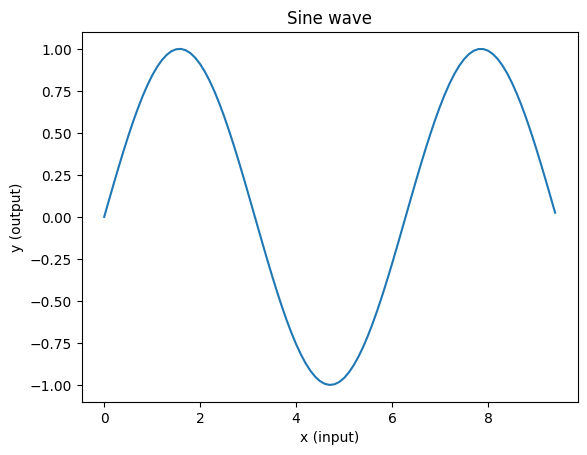

In [23]:

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
# plt.figure(figsize=(8,4)) uncomment to change the size of the plot
plt.plot(x, y)
plt.title('Sine wave')
plt.xlabel('x (input)')
plt.ylabel('y (output)')





With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:


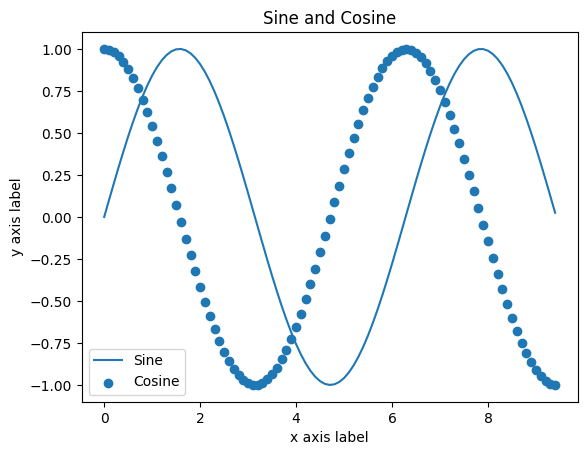

In [34]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.scatter(x, y_cos)   # scatter plot
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])


### Histogram

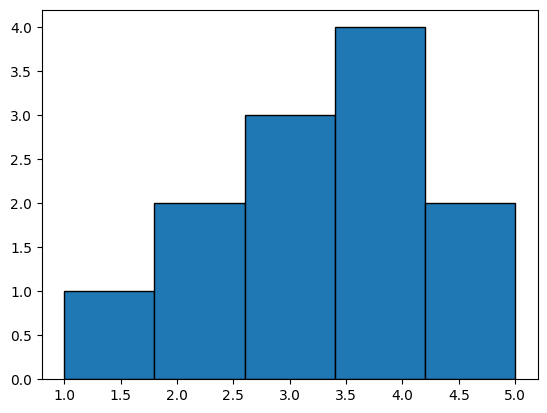

In [25]:
# Simple data
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5]

# Create a histogram
plt.hist(data, bins=5, edgecolor='black')

# Show the plot
plt.show()

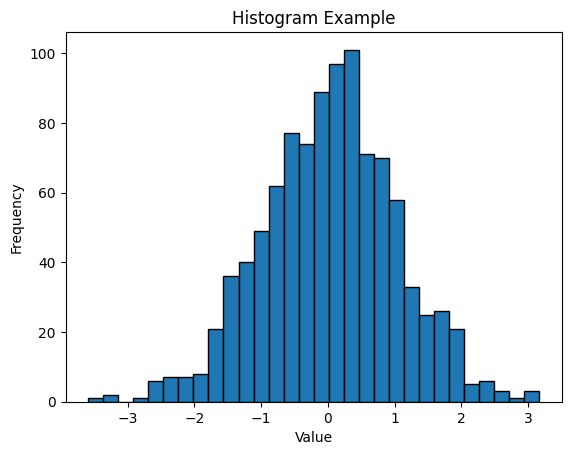

In [26]:
# Generate some random data
data = np.random.randn(1000)
# Note: numpy.random.randn generates samples from the normal distribution, 
# while numpy.random.rand from a uniform distribution (in the range [0,1)).

# Create the histogram
plt.hist(data, bins=30, edgecolor='black')

# Add titles and labels
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### Boxplot

/var/folders/0_/zm7zy0w53xz9b19cwd54rbfc0000gn/T/ipykernel_9508/3717810746.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Box'])


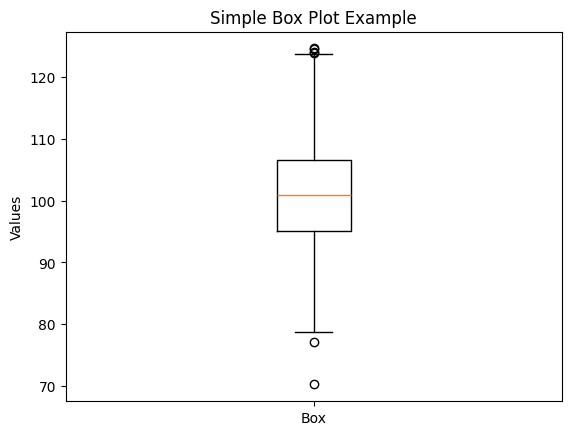

In [27]:
from matplotlib import pyplot as plt
import numpy as np
# Create some random data
np.random.seed(10)
data = [np.random.normal(100, 10, 200)]

# print(data)
# Create a box plot
plt.boxplot(data, labels=['Box'])

# Add a title and labels
plt.title("Simple Box Plot Example")
plt.ylabel("Values")

# Show the plot
plt.show()

- The horizontal line inside the box represents the `median` (or 2nd quartile, Q2), which is the middle value of the data (50th percentile). Half the data points lie below this value and half above it.

- Q1 (25th percentile): The bottom edge of the box. 25% of the data falls below this value.

- Q3 (75th percentile): The top edge of the box. 75% of the data falls below this value.

- Min and Max: The lowest and highest data points excluding outliers.


### Subplots (optional) 

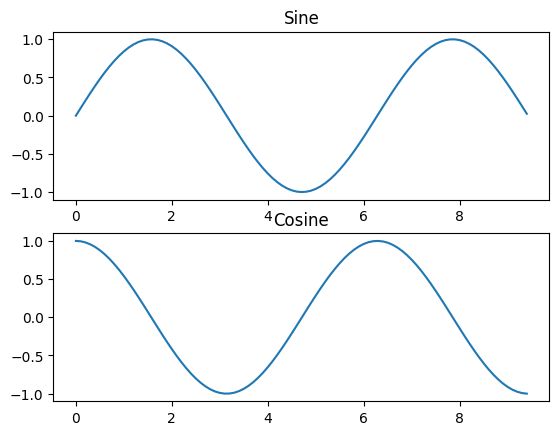

In [28]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

**Object oriented programming stype:** 

subplots using fig and ax objects. This is very common and recommended way of creating subplots.
This gives you more control over the figure and axes objects, which are very useful when you want to customize your plots.

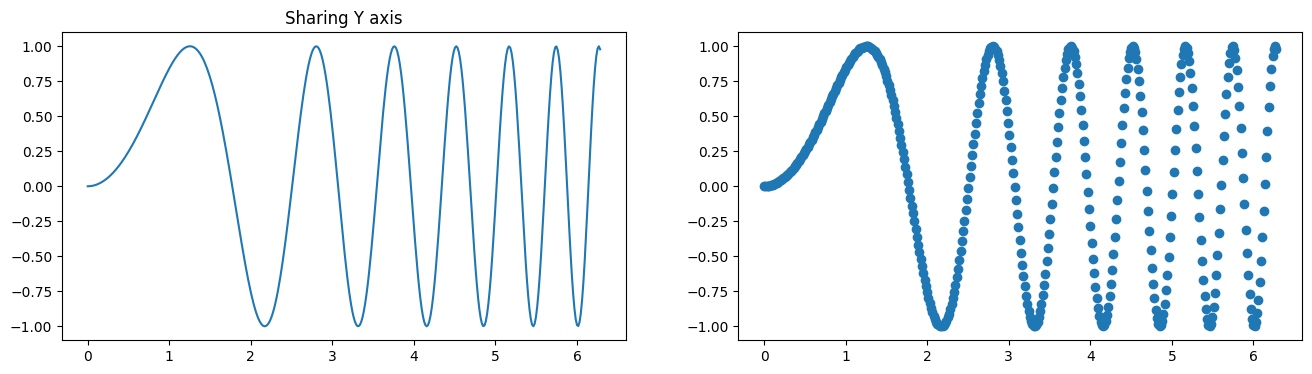

In [29]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create two subplots and unpack the output array immediately
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(x, y)
axs[0].set_title('Sharing Y axis')
axs[1].scatter(x, y)

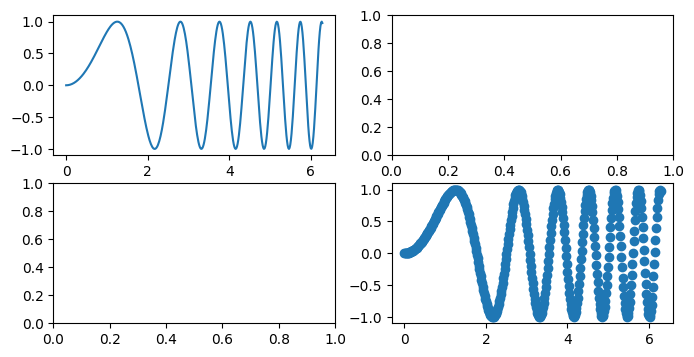

In [30]:
# Create four polar Axes and access them through the returned array
fig, axs = plt.subplots(2, 2, figsize=(8, 4))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

Even when we just have one plot we may use fig and ax objects to have more control over the plot.

Text(0.5, 1.0, 'Simple plot')

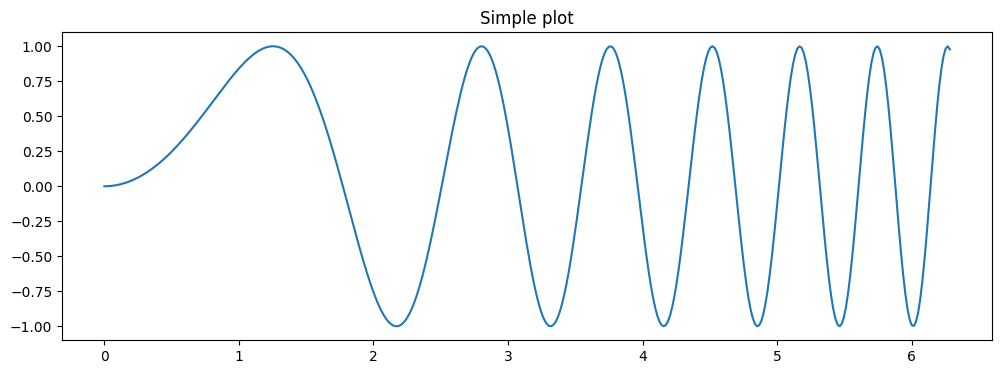

In [31]:
# Just a figure and one subplot
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x, y)
ax.set_title('Simple plot')